<a href="https://colab.research.google.com/github/Data-finest/Habibty/blob/main/ML_TestRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Facial Attribute Recognition**

## Mounting File from Google Colaboratory.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import cv2,glob

items = glob.glob("/content/drive/MyDrive/continue/*") 
aaa = []
for each_image in items:
  #if each_image.endswith(".jpg") or each_image.endswith(".jpeg"):

  image = cv2.imread(each_image)
  image = cv2.resize(image, (96,96))
  aaa.append(image)

## Importing Libraries

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from os import listdir
import cv2,glob
from skimage import io
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from keras.models import Sequential
from keras_preprocessing.image import image_data_generator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
import numpy as np

/content/drive/MyDrive/continue/emotionet_3_44993.jpg
A sample file name: /content/drive/MyDrive/continue/emotionet_3_153838.jpg
shape information of two arbitrary images: (580, 435, 3) - this one is shown below, and (640, 480, 3)
(580, 435, 3)


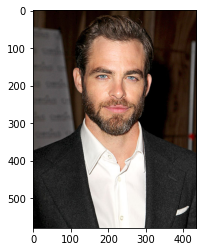

In [ ]:
print (items[0])
file_1st = items 
print("A sample file name: {}".format(file_1st[2]))
image = cv2.imread(file_1st[2])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("shape information of two arbitrary images: {} - this one is shown below, and {}".format(image.shape, cv2.imread(file_1st[3]).shape))
plt.imshow(image)
print(image.shape)

Dataset creation steps
1. We will first create a sample file which will contain all the image filenames and an arbitrary label [randomly assigned between 0-4] - hair_top classification.
2. We will then read this created file with the labels and separate them into training and testing set [together with the random labels].
3. The images are also not of consistent dimension [can be seen in the above cell] - we will just resize the image to a fixed dimension [though this is not ideal way to resolve this problem at all].

In [ ]:
# the 4 classes for the hair_top
class_names = ["bald or shaved", "has_few_hair", "has_thick_hair", "not visible"]  

df = pd.read_csv(r"/content/drive/MyDrive/dataset.csv", usecols= ["image_name", "hair_top"]) 
               
# data = pd.read_csv(r"C:\Users\adeniyi\Desktop\MSc FIles\Ap.Machine Learning\courework annotation tool\ML_export_dataframe.csv", usecols= ["image_name", "hair_top"])
print("The proportion of the different hair top labels: ")
# you may see equal proportion: logical since we have randomly assigned the label
df.groupby(["hair_top"]).count()

In [ ]:
image_1st = [] # this list will hold all the images
for i in range(df.shape[0]):  # read the image one by one
    # image = cv2.imread(directory_struct + df.iloc[i]["image_name"])
    # image = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR)
    # image = cv2.resize(image, (96,96), interpolation = cv2.INTER_AREA)
    # image_1st.append(image) 
  image = Image.open("/content/drive/MyDrive/continue/" + df.iloc[i]["image_name"]).convert("RGB")
  image = image.resize((96,96)) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm
                                                                                                                        # this actually ensures all the features [pixel values] will be of same size
  image_1st.append(np.array(image)) # appending the read image to a list

# x = np.array(image_1st)

,image_name,hair_top,image
0,emotionet_3_24.jpg,2,"[[[204, 210, 210], [204, 210, 210], [204, 210,..."
1,emotionet_3_89.jpg,1,"[[[191, 191, 191], [191, 191, 191], [191, 191,..."


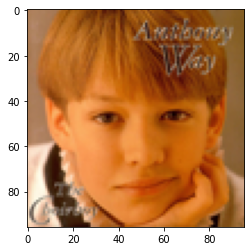

In [ ]:
df["image"] = image_1st  # creating a new column that holds all the images
# showing the same image that we have displayed before
# see the change because of resizing
plt.imshow(df.iloc[2]["image"])
df.head(2)

In [ ]:
images = np.asarray(list(df["image"]), np.uint8)
hair_top = np.asarray(df.hair_top).reshape(-1, 1)
hair_top = to_categorical(hair_top) # one-hot encoding 
# [0,0,1]

In [ ]:
from sklearn.model_selection import train_test_split
#it ensures equal proportion of the multiclass labels in the training/test set
X_train, X_test, y_train, y_test = train_test_split(images, hair_top, test_size = 0.2, stratify = hair_top, random_state=42)

In [ ]:
X_train.shape, y_train.shape
# (1573, 4)

((1573, 96, 96, 3), (1573, 4))

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

# xx = X_train.to_numpy
# yy = y_train.to_numpy

(1573, 96, 96, 3)
(394, 96, 96, 3)
(1573, 4)
(394, 4)


In [ ]:
# Normalization of pixel values (to [0-1] range)
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1573, 96, 96, 3)
(394, 96, 96, 3)


In [ ]:
#loading training data for augumentation 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # sheer_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 96
)

In [ ]:
#loading testing data
test_dataset = ImageDataGenerator()
test_generator = test_dataset.flow(
    X_test,
    y_test,
    batch_size = 96
)

In [ ]:
df.head()

,image_name,hair_top,image
0,emotionet_3_24.jpg,2,"[[[204, 210, 210], [204, 210, 210], [204, 210,..."
1,emotionet_3_89.jpg,1,"[[[191, 191, 191], [191, 191, 191], [191, 191,..."
2,emotionet_3_164.jpg,1,"[[[170, 124, 88], [172, 126, 91], [175, 129, 9..."
3,emotionet_3_273.jpg,2,"[[[216, 192, 37], [217, 193, 21], [226, 204, 2..."
4,emotionet_3_274.jpg,3,"[[[182, 162, 199], [183, 163, 201], [183, 165,..."


In [ ]:
df['hair_top'].hist()

In [ ]:
df_hair = df[df['hair_top']!=1]
df_hair = df_hair[df_hair['hair_top']!=2]
frames = [df, df_hair, df_hair]
df_new=pd.concat(frames)
df_hair = df_hair[df_hair['hair_top']!=3]
df_new['hair_top'].hist()
frames = [df_new, df_hair, df_hair,df_hair]
df_new=pd.concat(frames)
df_new['hair_top'].hist()

In [ ]:
frames = [df, df_hair, df_hair]
df_new=pd.concat(frames)

In [ ]:
df_hair = df_hair[df_hair['hair_top']!=3]

In [ ]:
df_new['hair_top'].hist()

In [ ]:
frames = [df_new, df_hair, df_hair,df_hair]
df_new=pd.concat(frames)


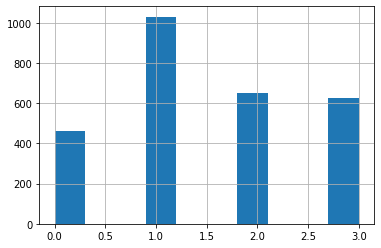

In [ ]:
df_new['hair_top'].hist()

In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.summary()

In [ ]:
cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)

Epoch 1/30
17/17 [==============================] - 5s 257ms/step - loss: 1.1036 - accuracy: 0.4959 - val_loss: 1.8969 - val_accuracy: 0.3756
Epoch 2/30
17/17 [==============================] - 4s 246ms/step - loss: 1.0773 - accuracy: 0.5238 - val_loss: 1.8720 - val_accuracy: 0.3858
Epoch 3/30
17/17 [==============================] - 4s 242ms/step - loss: 1.0725 - accuracy: 0.5238 - val_loss: 1.8608 - val_accuracy: 0.3858
Epoch 4/30
17/17 [==============================] - 4s 240ms/step - loss: 1.0736 - accuracy: 0.5238 - val_loss: 1.8570 - val_accuracy: 0.3858
Epoch 5/30
17/17 [==============================] - 4s 242ms/step - loss: 1.0720 - accuracy: 0.5238 - val_loss: 1.8471 - val_accuracy: 0.3858
Epoch 6/30
17/17 [==============================] - 4s 242ms/step - loss: 1.0707 - accuracy: 0.5238 - val_loss: 1.8838 - val_accuracy: 0.3858
Epoch 7/30
17/17 [==============================] - 4s 241ms/step - loss: 1.0705 - accuracy: 0.5238 - val_loss: 1.8574 - val_accuracy: 0.3883
Epoch 

*Validating the dataset*

Epoch 1/30
17/17 [==============================] - 4s 247ms/step - loss: 1.0710 - accuracy: 0.5238 - val_loss: 1.7528 - val_accuracy: 0.4112
Epoch 2/30
17/17 [==============================] - 4s 244ms/step - loss: 1.0713 - accuracy: 0.5238 - val_loss: 1.7356 - val_accuracy: 0.4112
Epoch 3/30
17/17 [==============================] - 4s 246ms/step - loss: 1.0703 - accuracy: 0.5238 - val_loss: 1.7298 - val_accuracy: 0.4112
Epoch 4/30
17/17 [==============================] - 4s 246ms/step - loss: 1.0704 - accuracy: 0.5238 - val_loss: 1.7344 - val_accuracy: 0.3985
Epoch 5/30
17/17 [==============================] - 4s 244ms/step - loss: 1.0706 - accuracy: 0.5238 - val_loss: 1.7315 - val_accuracy: 0.4162
Epoch 6/30
17/17 [==============================] - 4s 244ms/step - loss: 1.0706 - accuracy: 0.5238 - val_loss: 1.7444 - val_accuracy: 0.4086
Epoch 7/30
17/17 [==============================] - 4s 246ms/step - loss: 1.0703 - accuracy: 0.5238 - val_loss: 1.7140 - val_accuracy: 0.4137
Epoch 

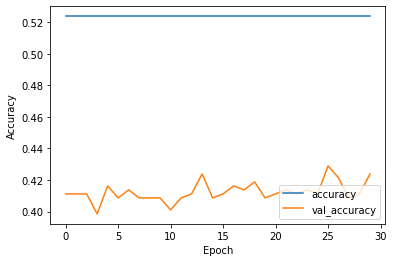

In [ ]:
# Validation
# Training
history = cnn.fit(train_generator, epochs=30, batch_size=64, 
                    validation_data=test_generator)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
50/50 [==============================] - 3s 33ms/step - loss: 1.1966 - accuracy: 0.4853 - val_loss: 1.0804 - val_accuracy: 0.5254
Epoch 2/30
50/50 [==============================] - 1s 24ms/step - loss: 1.0839 - accuracy: 0.5201 - val_loss: 1.0796 - val_accuracy: 0.5254
Epoch 3/30
50/50 [==============================] - 1s 24ms/step - loss: 1.1093 - accuracy: 0.5083 - val_loss: 1.0760 - val_accuracy: 0.5254
Epoch 4/30
50/50 [==============================] - 1s 24ms/step - loss: 1.0669 - accuracy: 0.5190 - val_loss: 1.0771 - val_accuracy: 0.5254
Epoch 5/30
50/50 [==============================] - 1s 24ms/step - loss: 1.0860 - accuracy: 0.5218 - val_loss: 1.0719 - val_accuracy: 0.5254
Epoch 6/30
50/50 [==============================] - 1s 24ms/step - loss: 1.0792 - accuracy: 0.5137 - val_loss: 1.0720 - val_accuracy: 0.5254
Epoch 7/30
50/50 [==============================] - 1s 24ms/step - loss: 1.0523 - accuracy: 0.5365 - val_loss: 1.0711 - val_accuracy: 0.5254
Epoch 8/30
50

*Training*

Epoch 1/30
7/7 [==============================] - 1s 158ms/step - loss: 0.9226 - accuracy: 0.6268 - val_loss: 1.2462 - val_accuracy: 0.5102
Epoch 2/30
7/7 [==============================] - 1s 141ms/step - loss: 0.8832 - accuracy: 0.6408 - val_loss: 1.2712 - val_accuracy: 0.4619
Epoch 3/30
7/7 [==============================] - 1s 139ms/step - loss: 0.8601 - accuracy: 0.6383 - val_loss: 1.2641 - val_accuracy: 0.4543
Epoch 4/30
7/7 [==============================] - 1s 140ms/step - loss: 0.8142 - accuracy: 0.6739 - val_loss: 1.3028 - val_accuracy: 0.4695
Epoch 5/30
7/7 [==============================] - 1s 140ms/step - loss: 0.7740 - accuracy: 0.6968 - val_loss: 1.3351 - val_accuracy: 0.4949
Epoch 6/30
7/7 [==============================] - 1s 143ms/step - loss: 0.7174 - accuracy: 0.7190 - val_loss: 1.4254 - val_accuracy: 0.5076
Epoch 7/30
7/7 [==============================] - 1s 140ms/step - loss: 0.6986 - accuracy: 0.7394 - val_loss: 1.4617 - val_accuracy: 0.4772
Epoch 8/30
7/7 [====

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


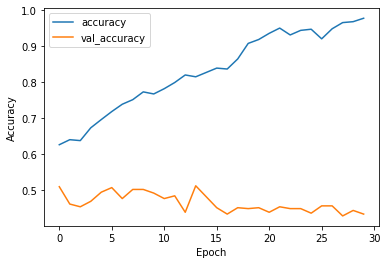

In [ ]:
history = cnn.fit(X_train, y_train,  epochs=30, batch_size=256, 
                    validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='Best')

In [ ]:
predictions = cnn.predict(test_generator)
predictions[1]

array([0.01565997, 0.5996871 , 0.32037383, 0.06427909], dtype=float32)

In [ ]:
predictions_index = np.argmax(predictions, axis=1) # Convert one-hot to index; remember indexing starts from 0; index takes integers values in [0,9]
predictions_index

In [ ]:
train_generator.reset()
pred = cnn.predict_generator(train_generator, steps=len(train_generator), verbose=2)

from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

y_pred = np.argmax(pred, axis=1)

x_gen,y_gen = train_generator.next()
y_gen = np.argmax(y_gen, axis=1)

print('Confusion Matrix')
print(pd.DataFrame(confusion_matrix(y_gen, y_pred)))

In [ ]:

class_names = ["brown", "black", "grey", "blond", "red",
               "white", "mixed", "others", "not visible"]

df = pd.read_csv(r"/content/drive/MyDrive/dataset.csv", usecols= ["image_name", "hair_color"]) 
               
print("The proportion of the different hair color labels: ")
df.groupby(["hair_color"]).count()

In [ ]:
image_1st = [] 
for i in range(df.shape[0]):  
    # image = cv2.imread(directory_struct + df.iloc[i]["image_name"])
    # image = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR)
    # image = cv2.resize(image, (96,96), interpolation = cv2.INTER_AREA)
    # image_1st.append(image) 
  image = Image.open("/content/drive/MyDrive/continue/" + df.iloc[i]["image_name"]).convert("RGB")
  image = image.resize((96,96))
  image_1st.append(np.array(image))

,image_name,hair_color,image
0,emotionet_3_24.jpg,6,"[[[204, 210, 210], [204, 210, 210], [204, 210,..."
1,emotionet_3_89.jpg,1,"[[[191, 191, 191], [191, 191, 191], [191, 191,..."


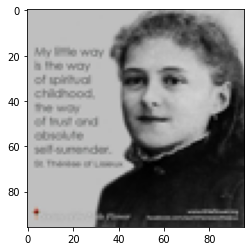

In [ ]:
df["image"] = image_1st  
plt.imshow(df.iloc[1]["image"])
df.head(2)

In [ ]:
images = np.asarray(list(df["image"]), np.uint8)
hair_color = np.asarray(df.hair_color).reshape(-1, 1)
hair_color = to_categorical(hair_color)

In [ ]:
from sklearn.model_selection import train_test_split
#it ensures equal proportion of the multiclass labels in the training/test set
X_train, X_test, y_train, y_test = train_test_split(images, hair_color, test_size = 0.2, stratify = hair_color, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((1573, 96, 96, 3), (1573, 9))

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


In [ ]:
# Normalization of pixel values (to [0-1] range)
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
#loading training data for data augumentation 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # sheer_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 96
)

In [ ]:
#loading testing data
test_dataset = ImageDataGenerator()
test_generator = test_dataset.flow(
    X_test,
    y_test,
    batch_size = 96
)

In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dense(9, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.summary()

In [ ]:
cnn.fit(x=train_generator, validation_data=test_generator, epochs=80)

Epoch 1/80
17/17 [==============================] - 5s 266ms/step - loss: 2.1124 - accuracy: 0.3695 - val_loss: 8.5189 - val_accuracy: 0.3934
Epoch 2/80
17/17 [==============================] - 4s 248ms/step - loss: 1.8471 - accuracy: 0.3828 - val_loss: 12.5684 - val_accuracy: 0.3934
Epoch 3/80
17/17 [==============================] - 4s 245ms/step - loss: 1.8185 - accuracy: 0.3854 - val_loss: 10.0669 - val_accuracy: 0.3934
Epoch 4/80
17/17 [==============================] - 4s 247ms/step - loss: 1.7799 - accuracy: 0.3963 - val_loss: 7.5951 - val_accuracy: 0.3934
Epoch 5/80
17/17 [==============================] - 4s 246ms/step - loss: 1.7767 - accuracy: 0.4061 - val_loss: 6.9916 - val_accuracy: 0.3934
Epoch 6/80
17/17 [==============================] - 4s 245ms/step - loss: 1.7647 - accuracy: 0.4012 - val_loss: 5.7286 - val_accuracy: 0.3934
Epoch 7/80
17/17 [==============================] - 4s 244ms/step - loss: 1.7991 - accuracy: 0.3914 - val_loss: 6.0116 - val_accuracy: 0.3934
Epoc

In [ ]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Epoch 1/80
50/50 [==============================] - 2s 33ms/step - loss: 1.9254 - accuracy: 0.4050 - val_loss: 1.8051 - val_accuracy: 0.3934
Epoch 2/80
50/50 [==============================] - 1s 24ms/step - loss: 1.8252 - accuracy: 0.4077 - val_loss: 1.7946 - val_accuracy: 0.3934
Epoch 3/80
50/50 [==============================] - 1s 25ms/step - loss: 1.7904 - accuracy: 0.3899 - val_loss: 1.7935 - val_accuracy: 0.3934
Epoch 4/80
50/50 [==============================] - 1s 25ms/step - loss: 1.8291 - accuracy: 0.3727 - val_loss: 1.7853 - val_accuracy: 0.3934
Epoch 5/80
50/50 [==============================] - 1s 25ms/step - loss: 1.8055 - accuracy: 0.4162 - val_loss: 1.7915 - val_accuracy: 0.3934
Epoch 6/80
50/50 [==============================] - 1s 25ms/step - loss: 1.7586 - accuracy: 0.4128 - val_loss: 1.7854 - val_accuracy: 0.3934
Epoch 7/80
50/50 [==============================] - 1s 25ms/step - loss: 1.7824 - accuracy: 0.3885 - val_loss: 1.7864 - val_accuracy: 0.3934
Epoch 8/80
50

In [ ]:
#Glasses
class_names = ["does_not_wear", "wear_ normal", "wear_sunglasses"]   

df = pd.read_csv(r"/content/drive/MyDrive/dataset.csv", usecols= ["image_name", "glasses"]) 
               
print("The proportion of the different glasses labels: ")
df.groupby(["glasses"]).count()

The proportion of the different glasses labels: 


,image_name
glasses,
0,1766
1,177
2,24


In [ ]:
image_1st = [] 
for i in range(df.shape[0]): 
  image = Image.open("/content/drive/MyDrive/continue/" + df.iloc[i]["image_name"]).convert("RGB")
  image = image.resize((96,96))
  image_1st.append(np.array(image))

In [ ]:
df["image"] = image_1st  
plt.imshow(df.iloc[1]["image"])
df.head(2)

In [ ]:
images = np.asarray(list(df["image"]), np.uint8)
glasses = np.asarray(df.glasses).reshape(-1, 1)
glasses = to_categorical(glasses)

In [ ]:
from sklearn.model_selection import train_test_split
#it ensures equal proportion of the multiclass labels in the training/test set
X_train, X_test, y_train, y_test = train_test_split(images, glasses, test_size = 0.2, stratify = glasses, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1573, 96, 96, 3)
(394, 96, 96, 3)
(1573, 3)
(394, 3)


In [ ]:
# Normalization of pixel values (to [0-1] range)
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
#loading training data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # sheer_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32
)


In [ ]:
#loading testing data
test_dataset = ImageDataGenerator()
test_generator = test_dataset.flow(
    X_test,
    y_test,
    batch_size =32
)

In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(3, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.summary()

In [ ]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

In [ ]:
# import tensorflow as tf

# from tensorflow.keras import datasets, layers, models, optimizers
# import matplotlib.pyplot as plt
# import pandas as pd

# import numpy as np
# from os import listdir
# import cv2,glob
# from skimage import io
# from PIL import Image

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# from keras.models import Sequential
# from keras_preprocessing.image import image_data_generator
# from keras.layers import BatchNormalization
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# from keras.datasets import cifar10
# from keras.utils import normalize, to_categorical
# import numpy as np

In [ ]:
#freakles
class_names = ["does_not_have", "has"]   

df = pd.read_csv(r"/content/drive/MyDrive/dataset.csv", usecols= ["image_name", "freakles"]) 
               
print("The proportion of the different freakles labels: ")
df.groupby(["freakles"]).count()

The proportion of the different freakles labels: 


,image_name
freakles,
0,1891
1,76


,image_name,freakles,image
0,emotionet_3_24.jpg,0,"[[[204, 210, 210], [204, 210, 210], [204, 210,..."
1,emotionet_3_89.jpg,0,"[[[191, 191, 191], [191, 191, 191], [191, 191,..."
2,emotionet_3_164.jpg,0,"[[[170, 124, 88], [172, 126, 91], [175, 129, 9..."
3,emotionet_3_273.jpg,0,"[[[216, 192, 37], [217, 193, 21], [226, 204, 2..."
4,emotionet_3_274.jpg,0,"[[[182, 162, 199], [183, 163, 201], [183, 165,..."


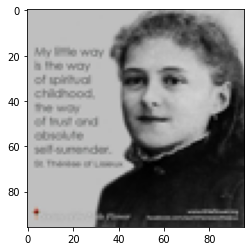

In [ ]:
df["image"] = image_1st  
plt.imshow(df.iloc[1]["image"])
df.head(5)

In [ ]:
images = np.asarray(list(df["image"]), np.uint8)
freakles = np.asarray(df.freakles).reshape(-1, 1)
freakles = to_categorical(freakles)

In [ ]:
from sklearn.model_selection import train_test_split
#it ensures equal proportion of the multiclass labels in the training/test set
X_train, X_test, y_train, y_test = train_test_split(images, freakles, test_size = 0.2, stratify = freakles, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

In [ ]:
# Normalization of pixel values (to [0-1] range)
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
#loading training data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # sheer_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32
)

In [ ]:
#loading testing data
test_dataset = ImageDataGenerator()
test_generator = test_dataset.flow(
    X_test,
    y_test,
    batch_size =32
)

In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(2, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 94, 94, 48)        1344      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 47, 48)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 48)        20784     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 48)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 32)        13856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)         

In [ ]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Epoch 1/80
50/50 [==============================] - 2s 32ms/step - loss: 0.3780 - accuracy: 0.8773 - val_loss: 0.1758 - val_accuracy: 0.9619
Epoch 2/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1809 - accuracy: 0.9591 - val_loss: 0.1661 - val_accuracy: 0.9619
Epoch 3/80
50/50 [==============================] - 1s 24ms/step - loss: 0.1756 - accuracy: 0.9587 - val_loss: 0.1887 - val_accuracy: 0.9619
Epoch 4/80
50/50 [==============================] - 1s 24ms/step - loss: 0.1826 - accuracy: 0.9612 - val_loss: 0.1686 - val_accuracy: 0.9619
Epoch 5/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1853 - accuracy: 0.9574 - val_loss: 0.1656 - val_accuracy: 0.9619
Epoch 6/80
50/50 [==============================] - 1s 24ms/step - loss: 0.1711 - accuracy: 0.9604 - val_loss: 0.1774 - val_accuracy: 0.9619
Epoch 7/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1969 - accuracy: 0.9584 - val_loss: 0.1675 - val_accuracy: 0.9619
Epoch 8/80
50

In [ ]:
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
#Wrinkles
class_names = ["does_not_have", "has"]   

df = pd.read_csv(r"/content/drive/MyDrive/dataset.csv", usecols= ["image_name", "wrinkles"]) 
               
print("The proportion of the different wrinkles labels: ")
df.groupby(["wrinkles"]).count()

The proportion of the different wrinkles labels: 


,image_name
wrinkles,
0,1638
1,329


,image_name,wrinkles,image
0,emotionet_3_24.jpg,0,"[[[204, 210, 210], [204, 210, 210], [204, 210,..."
1,emotionet_3_89.jpg,0,"[[[191, 191, 191], [191, 191, 191], [191, 191,..."
2,emotionet_3_164.jpg,0,"[[[170, 124, 88], [172, 126, 91], [175, 129, 9..."
3,emotionet_3_273.jpg,0,"[[[216, 192, 37], [217, 193, 21], [226, 204, 2..."
4,emotionet_3_274.jpg,0,"[[[182, 162, 199], [183, 163, 201], [183, 165,..."


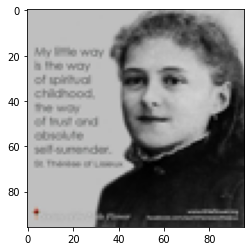

In [ ]:
df["image"] = image_1st  
plt.imshow(df.iloc[1]["image"])
df.head(5)

In [ ]:
images = np.asarray(list(df["image"]), np.uint8)
wrinkles = np.asarray(df.wrinkles).reshape(-1, 1)
wrinkles = to_categorical(wrinkles)

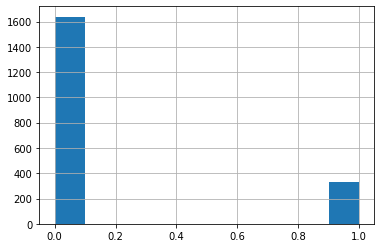

In [ ]:
df["wrinkles"].hist()

In [ ]:
df_wrinkles = df[df["wrinkles"]!=0]
# df_hair = df_hair[df_hair['df_wrinkles']!=2]
frames = [df, df_wrinkles, df_wrinkles]
df_new=pd.concat(frames)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf06b1bfd0>]],
      dtype=object)

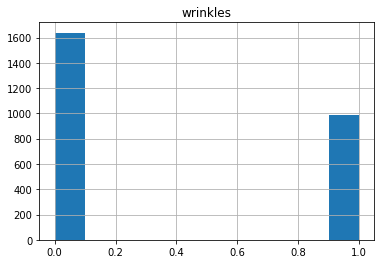

In [ ]:
df_new.hist()

In [ ]:
from sklearn.model_selection import train_test_split
#it ensures equal proportion of the multiclass labels in the training/test set
X_train, X_test, y_train, y_test = train_test_split(images, freakles, test_size = 0.2, stratify = freakles, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1573, 96, 96, 3)
(394, 96, 96, 3)
(1573, 2)
(394, 2)


In [ ]:
# Normalization of pixel values (to [0-1] range)
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
#loading training data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # sheer_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True)

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32
)

In [ ]:
#loading testing data
test_dataset = ImageDataGenerator()
test_generator = test_dataset.flow(
    X_test,
    y_test,
    batch_size =32
)

In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[96, 96, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(2, activation='softmax'))

# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 94, 94, 48)        1344      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 48)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 45, 45, 48)        20784     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 48)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 32)        13856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 32)         

In [ ]:
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Epoch 1/80
50/50 [==============================] - 2s 31ms/step - loss: 0.3317 - accuracy: 0.9660 - val_loss: 0.1778 - val_accuracy: 0.9619
Epoch 2/80
50/50 [==============================] - 1s 24ms/step - loss: 0.1818 - accuracy: 0.9592 - val_loss: 0.1658 - val_accuracy: 0.9619
Epoch 3/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1926 - accuracy: 0.9564 - val_loss: 0.1690 - val_accuracy: 0.9619
Epoch 4/80
50/50 [==============================] - 1s 24ms/step - loss: 0.1719 - accuracy: 0.9626 - val_loss: 0.1843 - val_accuracy: 0.9619
Epoch 5/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1726 - accuracy: 0.9608 - val_loss: 0.1668 - val_accuracy: 0.9619
Epoch 6/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1426 - accuracy: 0.9687 - val_loss: 0.1659 - val_accuracy: 0.9619
Epoch 7/80
50/50 [==============================] - 1s 25ms/step - loss: 0.1958 - accuracy: 0.9515 - val_loss: 0.1657 - val_accuracy: 0.9619
Epoch 8/80
50